In [1]:
import numpy as np
from pylab import imshow, show
from timeit import default_timer as timer

In [2]:
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
        
    return max_iters

In [3]:
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

Mandelbrot created in 5.305423319824877


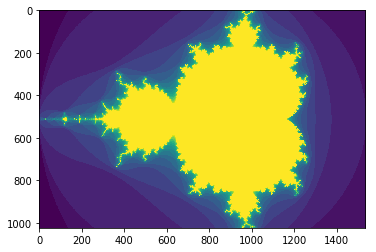

In [4]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
dt = timer() - start

print("Mandelbrot created in", dt)
imshow(image)
show()

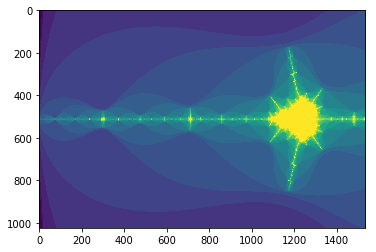

In [5]:
create_fractal(-2.0, -1.7, -0.1, 0.1, image, 20) 
imshow(image)
show()

In [6]:
from numba import autojit

@autojit
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    
    for i in range(max_iters):
        z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
        return i
    
    return max_iters

@autojit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    
    height = image.shape[0]
    width = image.shape[1]
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

Mandelbrot created in 0.6428213051712675


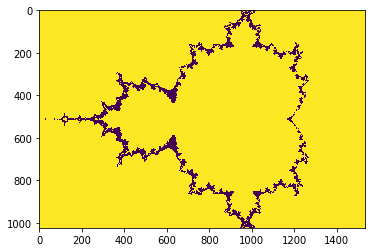

In [7]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
dt = timer() - start

print("Mandelbrot created in", dt)
imshow(image)
show()

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

D:\Users\bruno\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10132677997376814210
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1459512934
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2952920799205359895
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time
%matplotlib inline

def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    
    matrix_sizes = range(1,50000, 500)

    for size in matrix_sizes:
        
        print('size: ', size)
        
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.add(r2, r1)

            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes


device_times, matrix_sizes = get_times(1.5)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

size:  1
####### Calculating on the /gpu:0 #######
[[1.212]]
{'/gpu:0': [0.021556615829467773], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
[[0.9873]]
{'/gpu:0': [0.021556615829467773], '/cpu:0': [0.01955246925354004]}
size:  501
####### Calculating on the /gpu:0 #######
[[1.094  0.3682 0.7725 ... 0.9287 1.399  0.463 ]
 [1.095  1.042  1.154  ... 0.713  0.619  1.358 ]
 [0.698  1.163  0.798  ... 0.836  0.7285 1.066 ]
 ...
 [0.1221 0.7617 0.1641 ... 1.381  0.83   1.064 ]
 [0.7197 0.8457 1.419  ... 1.51   0.88   0.5723]
 [1.288  0.3262 0.699  ... 0.6885 0.6816 1.912 ]]
{'/gpu:0': [0.021556615829467773, 0.02105545997619629], '/cpu:0': [0.01955246925354004]}
####### Calculating on the /cpu:0 #######
[[1.639  0.9795 1.274  ... 1.458  0.7744 0.8516]
 [1.117  0.6924 0.4336 ... 1.736  0.625  1.459 ]
 [1.292  1.04   1.152  ... 1.199  1.316  0.169 ]
 ...
 [0.4072 1.245  0.783  ... 0.6006 1.041  1.637 ]
 [1.329  1.068  0.9834 ... 1.063  1.434  0.2852]
 [0.744  1.546  0.5127 ... 1.693  1

[[0.6875 1.322  1.186  ... 1.077  0.8525 1.6455]
 [1.676  0.588  0.4326 ... 1.239  1.567  0.949 ]
 [1.093  1.16   1.68   ... 0.998  1.555  0.7617]
 ...
 [1.555  0.541  0.533  ... 0.9434 1.444  1.392 ]
 [0.7656 1.073  1.845  ... 1.166  0.9766 0.797 ]
 [0.676  0.797  0.9404 ... 1.043  1.592  1.18  ]]
{'/gpu:0': [0.021556615829467773, 0.02105545997619629, 0.01190185546875, 0.031253814697265625, 0.028578758239746094, 0.025066137313842773, 0.030585765838623047, 0.03362393379211426, 0.03409171104431152], '/cpu:0': [0.01955246925354004, 0.026561975479125977, 0.04050087928771973, 0.05988574028015137, 0.10979151725769043, 0.1283409595489502, 0.172959566116333, 0.23061347007751465, 0.29929518699645996]}
size:  4501
####### Calculating on the /gpu:0 #######
[[0.1504 0.2803 1.066  ... 0.7793 0.834  1.35  ]
 [1.005  0.7217 0.7803 ... 1.454  1.197  0.709 ]
 [1.2295 1.445  0.4453 ... 0.6562 1.749  0.8584]
 ...
 [0.708  0.951  1.439  ... 0.783  0.951  0.6943]
 [0.8154 0.2012 1.7295 ... 0.4385 1.114  0

[[0.3242 0.996  0.288  ... 1.254  0.6123 0.6484]
 [1.335  0.2686 1.089  ... 1.287  0.6816 0.9004]
 [0.991  0.99   0.92   ... 1.034  0.2295 1.157 ]
 ...
 [1.29   1.545  0.836  ... 0.759  1.256  1.226 ]
 [0.9346 0.4316 0.916  ... 1.028  0.3223 1.557 ]
 [1.351  1.308  0.827  ... 0.4023 0.5674 0.954 ]]
{'/gpu:0': [0.021556615829467773, 0.02105545997619629, 0.01190185546875, 0.031253814697265625, 0.028578758239746094, 0.025066137313842773, 0.030585765838623047, 0.03362393379211426, 0.03409171104431152, 0.03759932518005371, 0.041643619537353516, 0.046657562255859375, 0.05163741111755371, 0.061663150787353516], '/cpu:0': [0.01955246925354004, 0.026561975479125977, 0.04050087928771973, 0.05988574028015137, 0.10979151725769043, 0.1283409595489502, 0.172959566116333, 0.23061347007751465, 0.29929518699645996, 0.35844850540161133, 0.4406700134277344, 0.5374290943145752, 0.6442131996154785, 0.7334895133972168]}
size:  7001
####### Calculating on the /gpu:0 #######
[[0.33    1.665   0.3066  ... 0.80

[[0.6357 0.962  0.5957 ... 0.924  1.721  0.5166]
 [1.459  1.402  0.6035 ... 0.798  1.579  1.2   ]
 [0.918  0.9023 1.488  ... 0.956  1.039  1.443 ]
 ...
 [1.312  1.106  0.4297 ... 1.232  1.391  0.5645]
 [1.748  0.6064 1.175  ... 1.021  1.425  1.184 ]
 [0.585  1.581  1.016  ... 1.365  1.689  0.994 ]]
{'/gpu:0': [0.021556615829467773, 0.02105545997619629, 0.01190185546875, 0.031253814697265625, 0.028578758239746094, 0.025066137313842773, 0.030585765838623047, 0.03362393379211426, 0.03409171104431152, 0.03759932518005371, 0.041643619537353516, 0.046657562255859375, 0.05163741111755371, 0.061663150787353516, 0.06968522071838379, 0.07220101356506348, 0.07570099830627441, 0.08021235466003418], '/cpu:0': [0.01955246925354004, 0.026561975479125977, 0.04050087928771973, 0.05988574028015137, 0.10979151725769043, 0.1283409595489502, 0.172959566116333, 0.23061347007751465, 0.29929518699645996, 0.35844850540161133, 0.4406700134277344, 0.5374290943145752, 0.6442131996154785, 0.7334895133972168, 0.817

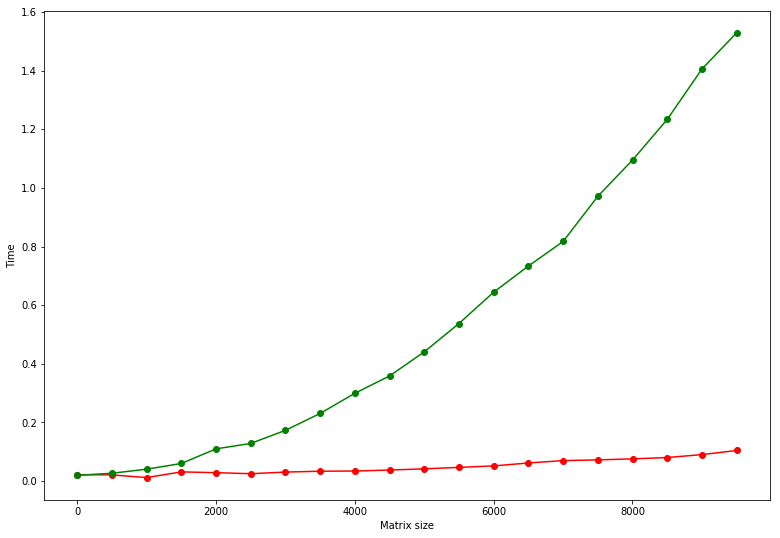

In [3]:
figure = plt.figure(figsize=(13,9))
plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-', color='red')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-', color='green')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()

In [18]:
from numba import cuda
gpu=cuda.get_current_device()

In [19]:
gpu.name

b'GeForce GTX 950M'